# SIC for NDMG Pipeline

The NDMG pipeline estimates connectomes from M3r (multi-modal MRI) scans. The NDMG pipeline is designed to operate with:

NDMG-d
+ 1xdiffusion-weighted image (DWI) for a particular subject.
+ 1xbval file giving the magnitude of diffuion vectors in the DWI.
+ 1xbvec file giving the direction of diffusion vectors in the DWI.
+ the corresponding T1w anatomical reference for the same subject.

NDMG-f
+ 1xfunctional magnetic-resonance image (fMRI) for a particular subject.
+ the slice-timing encoding for the fMRI scan.
+ the corresponding T1w anatomical reference for the same subject.

## Connectome Estimation

The FNGS pipeline must first translate our raw M3r images into connectomes. Pressing "run" on the cell below will call the ndmg demo scripts.

![fngs pipeline](https://user-images.githubusercontent.com/8883547/32184580-fe61bc6a-bd72-11e7-9a2a-119cca8132b3.png)
**Figure 1**: The workflow for the NDMG Pipeline. 

If you get "`process interrupted`" as an output for any step of this notebook refresh the page and start again from the top; this is due to the server rebooting which it is scheduled to do every few hours.

## NDMG-F Tutorial

Now that we are acquainted with the basics of the pipeline, feel free to click the cell below, and click the "play" button in the bar at the top. Alternatively, press shift + Enter from inside of the cell:

In [1]:
%%bash

ndmg_demo-func

Getting test data...
download: s3://mrneurodata/data/resources/ndmg_demo.zip to ./ndmg_demo.zip
Archive:  /tmp/ndmg_demo.zip
Creating output directory: /tmp/ndmg_demo/outputs
Creating output temp directory: /tmp/ndmg_demo/outputs/tmp
This pipeline will produce the following derivatives...
fMRI volumes preprocessed: /tmp/ndmg_demo/outputs/func/preproc/sub-0025864_ses-1_bold_preproc.nii.gz
T1w volume preprocessed: /tmp/ndmg_demo/outputs/anat/preproc/sub-0025864_ses-1_T1w_preproc_brain.nii.gz
fMRI volume registered to atlas: /tmp/ndmg_demo/outputs/func/registered/sub-0025864_ses-1_bold_space-MNI152NLin6_res-res-4x4x4_registered.nii.gz
fMRI volumes preprocessed: /tmp/ndmg_demo/outputs/func/preproc/sub-0025864_ses-1_bold_preproc.nii.gz
ROI timeseries downsampled to given labels: /tmp/ndmg_demo/outputs/func/roi-timeseries/desikan-res-4x4x4/sub-0025864_ses-1_bold_desikan-res-4x4x4_variant-mean_timeseries.npz
Connectomes downsampled to given labels: /tmp/ndmg_demo/outputs/func/connectomes/desi

replace ndmg_demo/MNI152NLin6_res-4x4x4_T1w.nii.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)
/home/eric/Documents/research/ndmg-repos/env-ndmg/local/lib/python2.7/site-packages/matplotlib/image.py:237: MaskedArrayFutureWarning:

setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.




To estimate our functional connectomes, we leverage many tools along the way, notably:

### NDMG-f Tools

 Step            |  Tool(s) leveraged  
-----------------|-------------------------
   Preprocessing |  mcflirt (FSL), slicetimer (FSL), 3dSkullStrip (AFNI)
   Registration  |  FLIRT (FSL), FLIRT-bbr (FSL), FNIRT (FSL), MNI 152 Template (MNI)
   Nuisance      |  Neurodata Code (Neurodata)
   Timeseries Extraction/Connectome Estimation | Parcellation Atlases
   
![image](https://user-images.githubusercontent.com/8883547/32188446-3b7a7082-bd7e-11e7-8436-8224ad7edf29.png)
   
**Figure 2**: The tools leveraged by the NDMG-f Pipeline.

### View Timeseries Estimation Results

Your fMRI timeseries can be viewed with the following code. This demo is on very small data, so it is not necessarily guaranteed to produce high-quality outputs as it was given drastically simpler data than most neuroscience applications, but it gives users a feel for the overall workflow. Click in the block, and press the "play" button at the top to execute it. 

/home/eric/Documents/research/ndmg-repos/env-ndmg/local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


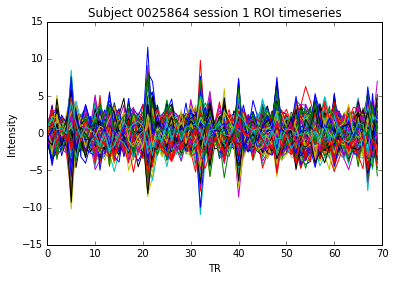

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

ts = np.load('/tmp/ndmg_demo/outputs/func/roi-timeseries/desikan-res-4x4x4/sub-0025864_ses-1_bold_desikan-res-4x4x4_variant-mean_timeseries.npz')['roi']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ts)
ax.set_xlabel('TR')
ax.set_ylabel('Intensity')
ax.set_title('Subject 0025864 session 1 ROI timeseries')
fig.show()

### View Connectome Estimation Results

You can view your functional connectome with the following code. Again, click anywhere in the block and press the "play" button to execute it.

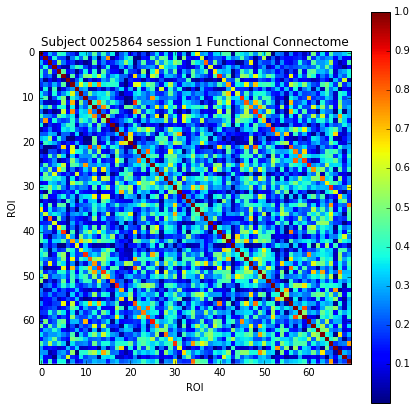

In [7]:
import networkx as nx

g = nx.read_gpickle('/tmp/ndmg_demo/outputs/func/connectomes/desikan-res-4x4x4/sub-0025864_ses-1_bold_desikan-res-4x4x4_measure-correlation.gpickle')
mtx = nx.to_numpy_matrix(g)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.imshow(mtx, interpolation='None')
ax.set_xlabel('ROI')
ax.set_ylabel('ROI')
ax.set_title('Subject 0025864 session 1 Functional Connectome')
fig.colorbar(cax)
fig.show()

###  Group Level Summary Statistics

In [10]:
%%bash

ndmg_bids /tmp/ndmg_demo/outputs/func/connectomes /tmp/ndmg_demo/outputs/func/group group func --atlas desikan-res-4x4x4

cp /tmp/ndmg_demo/outputs/func/group/connectomes/desikan-res-4x4x4/plot.html ./qc_desikan_fmri_plot.html

Parcellation: desikan-res-4x4x4
Computing: NNZ
Sample Mean: 2084.00
Computing: Max Local Statistic Sequence
Subject Means: 1542.63
Computing: Clustering Coefficient Sequence
Subject Means: 0.43
Computing: Degree Sequence
Subject Means: 88253.00
Computing: Path Length Sequence
Subject Means: 160.41
Computing: Eigen Value Sequence
Subject Maxes: 1.06
Computing: Betweenness Centrality Sequence
Subject Means: 0.04
Computing: Mean Connectome
['betweenness_centrality', 'clustering_coefficients', 'degree_distribution', 'eigen_sequence', 'locality_statistic', 'number_non_zeros', 'path_length', 'study_mean_connectome']
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]
[ (2,1) x5,y5 ]  [ (2,2) x6,y6 ]  [ (2,3) x7,y7 ]  [ (2,4) x8,y8 ]

Created new window in existing browser session.


[18049:18087:1030/152021.919179:ERROR:browser_gpu_channel_host_factory.cc(103)] Failed to launch GPU process.


### View Summary Statistics

The NDMG-f pipeline produces a plot which tells you about your functional connectomes. 

Click [this link](./qc_desikan_fmri_plot.html) to view the result!

## NDMG-d Tutorial

The cell below will similarly run the DWI pipeline demo:

In [1]:
%%bash

ndmg_demo-dwi

Getting test data...
download: s3://mrneurodata/data/resources/ndmg_demo.zip to ./ndmg_demo.zip
Archive:  /tmp/ndmg_demo.zip
Creating output directory: /tmp/ndmg_demo/outputs
Creating output temp directory: /tmp/ndmg_demo/outputs/tmp
This pipeline will produce the following derivatives...
DTI volume registered to atlas: /tmp/ndmg_demo/outputs/reg_dwi/sub-0025864_ses-1_dwi_aligned.nii.gz
Diffusion tensors in atlas space: /tmp/ndmg_demo/outputs/tensors/sub-0025864_ses-1_dwi_tensors.npz
Fiber streamlines in atlas space: /tmp/ndmg_demo/outputs/fibers/sub-0025864_ses-1_dwi_fibers.npz
Graphs of streamlines downsampled to given labels: /tmp/ndmg_demo/outputs/graphs/desikan-res-4x4x4/sub-0025864_ses-1_dwi_desikan-res-4x4x4.gpickle
Generating gradient table...
B-values shape (15,)
         min 0.000000 
         max 1000.000000 
B-vectors shape (15, 3)
         min -0.978756 
         max 0.941755 
None
Aligning volumes...
Executing: eddy_correct /tmp/ndmg_demo/outputs/tmp/sub-0025864_ses-1_dwi

replace ndmg_demo/MNI152NLin6_res-4x4x4_T1w.nii.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


### NDMG-d Tools

 Step            |  Tool(s) leveraged  
-----------------|-------------------------
   Registration |  FLIRT (FSL), MNI 152 Template (MNI)
   Tensor Estimation and Tractography      | Dipy, MNI152 Template (MNI)
   Connectome Estimation | Parcellation Atlases

![image](https://user-images.githubusercontent.com/8883547/32188482-57f79eec-bd7e-11e7-8239-573e97ed7813.png)
   
**Figure 3**: The tools leveraged by the NDMG-d Pipeline.

### View Connectome Estimation Results

You can view your structural connectome with the following code. Again, click anywhere in the block and press the "play" button to execute it.

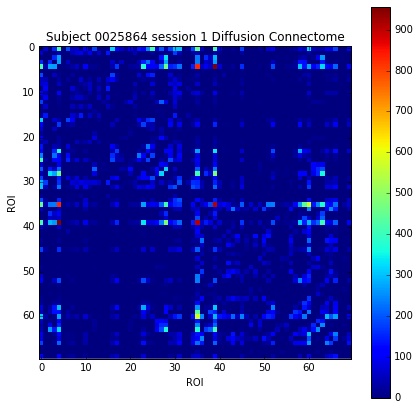

In [5]:
%matplotlib inline

g = nx.read_gpickle('/tmp/ndmg_demo/outputs/graphs/desikan-res-4x4x4/sub-0025864_ses-1_dwi_desikan-res-4x4x4.gpickle')
mtx = nx.to_numpy_matrix(g)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.imshow(mtx, interpolation='None')
ax.set_xlabel('ROI')
ax.set_ylabel('ROI')
ax.set_title('Subject 0025864 session 1 Diffusion Connectome')
fig.colorbar(cax)
fig.show()

### Group Level Analysis

The FNGS pipeline produces numerous statistical reports and quality assurance summaries, both qualitative and quantitative, at both the subject-specific and group level. The subject-level qa will be alongside your local outputs in the qa folder. To generate the group-level qa, we can use the following command:

In [11]:
%%bash

ndmg_bids /tmp/ndmg_demo/outputs/graphs /tmp/ndmg_demo/outputs/dwi/group group dwi

cp /tmp/ndmg_demo/outputs/dwi/group/connectomes/desikan-res-4x4x4/plot.html ./qc_desikan_dwi_plot.html

Parcellation: desikan-res-4x4x4
Computing: NNZ
Sample Mean: 887.00
Computing: Max Local Statistic Sequence
Subject Means: 24948.83
Computing: Clustering Coefficient Sequence
Subject Means: 0.75
Computing: Degree Sequence
Subject Means: 25.34
Computing: Edge Weight Sequence
Subject Means: 68.99
Computing: Eigen Value Sequence
Subject Maxes: 1.32
Computing: Betweenness Centrality Sequence
Subject Means: 0.01
Computing: Mean Connectome
['betweenness_centrality', 'clustering_coefficients', 'degree_distribution', 'edge_weight', 'eigen_sequence', 'locality_statistic', 'number_non_zeros', 'study_mean_connectome']
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]
[ (2,1) x5,y5 ]  [ (2,2) x6,y6 ]  [ (2,3) x7,y7 ]  [ (2,4) x8,y8 ]

Created new window in existing browser session.


cp: cannot stat '/tmp/ndmg_demo/outputs/dwi/group/connectomes/desikan-res-4x4x4/plot.html': No such file or directory
[18165:18204:1030/152041.437502:ERROR:browser_gpu_channel_host_factory.cc(103)] Failed to launch GPU process.


### View Summary Statistics

Click [this link](./qc_desikan_dwi_plot.html) to view the result!